In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\housesalesprediction\kc_house_data.csv")

df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [3]:
#Multiple linear regression

#Predicting_model - 1

In [4]:
df.corr()['price'].sort_values(ascending = False).index

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode'],
      dtype='object')

intercept : [-31812757.75881776]
coefficient : [[-4.38609138e+14  7.60401250e+04  4.38609138e+14  3.28125000e+00
  -1.31472511e+04  9.75398450e+04  4.38609138e+14 -3.18548015e+04
   6.61361056e+05]]
score : 0.6495977819141086
predicted_value : [[465128.26533469]
 [544625.33885248]
 [375952.65750998]
 ...
 [579779.76609354]
 [516862.66471698]
 [365898.96049396]]
MSE: 46202671577.38566
RMSE : 214948.06716364223
R2_score : 0.6495977819141086


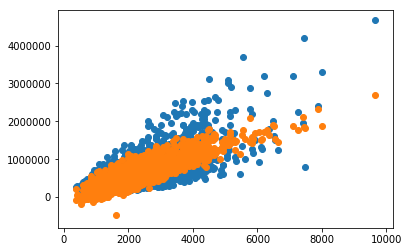

In [5]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

ln_reg = LinearRegression()

ln_reg.fit(x_train,y_train)

print('intercept :',ln_reg.intercept_)

print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test,y_test))

y_pred = ln_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [6]:
#Multiple linear Regression

#Predicting_model - 2

intercept : 61108032.55460237
coefficient : [ 1.22320007e+05  1.85461006e+02  6.17938267e+04  8.12760405e+05
  6.08038292e+05  1.91470958e+05  5.15105790e+01  4.50572435e-01
  3.13981323e-01 -4.11931285e+02  2.81520864e+04 -4.12203538e+04
 -1.16394889e-06 -1.06176698e+03]
score : 0.45792039820388875
predicted_value : [616287.15904412 262368.42299189 237153.73925196 ... 776550.11350901
 444252.9030326  812180.54941913]
MSE : 65112209989.217255
RMSE : 255170.9426819936
R2_score : 0.45792039820388875


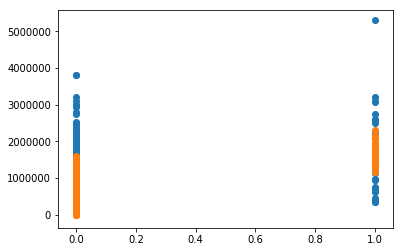

In [7]:
#selected features based on correlation of different data with prices for which corr value is below 30%


features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

ln_reg = LinearRegression()

ln_reg.fit(x_train,y_train)

print('intercept :',ln_reg.intercept_)

print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test,y_test))

y_pred = ln_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      
      

In [8]:
#Multiple linear Regression

#predicting_model-3

intercept : 6162078.490612427
coefficient : [ 1.15361014e+02  9.39442285e+04  7.45418278e+01  1.80900150e+01
  4.07998398e+04  5.02884826e+04  4.08191882e+01 -3.71616738e+04
  6.06390018e+05  6.17062197e+05  3.18581650e+03  2.00423515e+01
  1.62535480e-01 -4.58098836e-01 -2.59426453e+03  2.63428657e+04
 -2.20144931e+05 -1.31792331e-06 -5.85841363e+02]
score : 0.7220463522016294
predicted_value : [928849.95206973 491567.24458654 670202.89773245 ... 602898.52944604
 400887.2655282  230162.93282451]
MSE : 34200851064.32548
RMSE : 184934.72108916022
R2_score : 0.7220463522016294


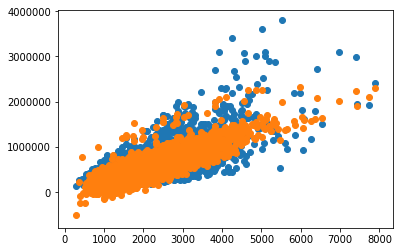

In [9]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

ln_reg = LinearRegression()

ln_reg.fit(x_train,y_train)

print('intercept :',ln_reg.intercept_)

print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test,y_test))

y_pred = ln_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()
      

In [10]:
#Lasso Regression

#Prediction model - 1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


intercept : [-31953144.54258888]
coefficient : [ 2.12239946e+02  7.73743862e+04 -1.86085466e+01  6.75751855e+00
 -1.05247343e+04  9.56935855e+04 -1.24881344e+01 -2.63620792e+04
  6.63825400e+05]
score : 0.6363380667244176
predicted_value : [ 430876.74922309  572410.10372699 1579177.61920899 ...  516390.07275505
  322402.61355311  104366.23319896]
MSE: 49410653440.73236
RMSE : 222285.07246491467
R2_score : 0.6363380667244176


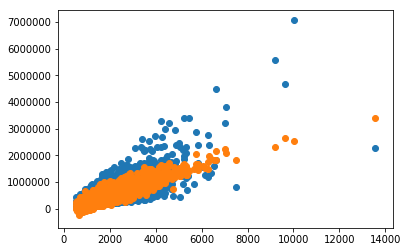

In [11]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

lasso = Lasso(alpha=0.2, normalize=True)

lasso.fit(x_train,y_train)

print('intercept :',lasso.intercept_)

print('coefficient :',lasso.coef_)

print('score :',lasso.score(x_test,y_test))

y_pred = lasso.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show()


In [12]:
#Lasso Regression

#predicting model - 2

intercept : 59084653.66586841
coefficient : [ 1.19238105e+05  1.88289301e+02  6.04206150e+04  8.17634032e+05
  6.33176149e+05  1.92565762e+05  5.78679400e+01  4.50911319e-01
  3.50092426e-01 -4.20103860e+02  2.93969996e+04 -2.90504815e+04
 -1.17464542e-06 -1.02819381e+03]
score : 0.442262026720842
predicted_value : [398758.20947908 182016.18964964 410751.76049195 ... 720329.50617071
 580535.09923501 673012.15375068]
MSE : 68591572884.2568
RMSE : 261899.92914137413
R2_score : 0.442262026720842


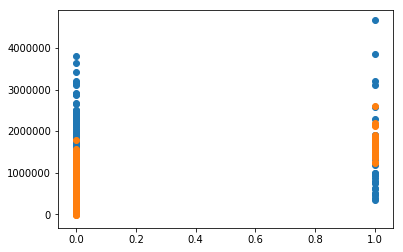

In [13]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

lasso = Lasso(alpha=0.2, normalize=True)

lasso.fit(x_train,y_train)

print('intercept :',lasso.intercept_)

print('coefficient :',lasso.coef_)

print('score :',lasso.score(x_test,y_test))

y_pred = lasso.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      

In [14]:
#Lasso Regression

#Predicting model - 3

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


intercept : 9374628.12907843
coefficient : [ 2.09957531e+02  9.59739587e+04 -2.96855185e+01  2.20532558e+01
  3.82531078e+04  5.32004884e+04 -6.12948479e+01 -3.34600154e+04
  6.08402235e+05  5.89426875e+05  7.23281885e+03  1.48372236e+01
  7.76524231e-02 -3.64087358e-01 -2.60688373e+03  2.72491343e+04
 -2.18697462e+05 -9.62488569e-07 -6.17739155e+02]
score : 0.6956319871663744
predicted_value : [ 921104.35713139 2193579.27752627  263369.21128458 ...  398454.32329531
  513363.45487505  395784.87371988]
MSE : 41735896255.30247
RMSE : 204293.6520191033
R2_score : 0.6956319871663744


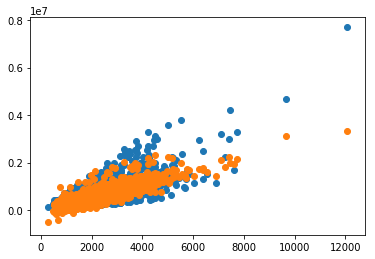

In [15]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

lasso = Lasso(alpha=0.2, normalize=True)

lasso.fit(x_train,y_train)

print('intercept :',lasso.intercept_)

print('coefficient :',lasso.coef_)

print('score :',lasso.score(x_test,y_test))

y_pred = lasso.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [16]:
#Ridge Regression

#Predicting model - 1

intercept : [-16988426.60466309]
coefficient : [[5.62798540e+01 4.66038979e+04 5.02425475e+01 5.16131045e+01
  3.12549072e+04 5.68297752e+04 6.53062136e+01 2.36962636e+03
  3.52294677e+05]]
score : 0.5737344259866168
predicted_value : [[547854.32506204]
 [505839.45491172]
 [520791.22794459]
 ...
 [599644.68607119]
 [446626.61744813]
 [564355.27192465]]
MSE: 62099959845.222565
RMSE : 249198.6353197436
R2_score : 0.5737344259866168


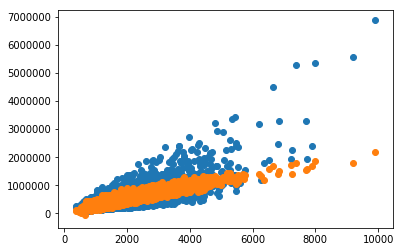

In [17]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

ridge = Ridge(normalize=True)

ridge.fit(x_train,y_train)

print('intercept :',ridge.intercept_)

print('coefficient :',ridge.coef_)

print('score :',ridge.score(x_test,y_test))

y_pred = ridge.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show()


In [18]:
#Ridge Regression

#Predicting model - 2

intercept : 9473266.252493434
coefficient : [ 7.19091156e+04  1.04389946e+02  4.44685148e+04  4.02268892e+05
  3.91183773e+05  8.41853012e+04  3.68250849e+01  2.76532424e-01
  3.43390429e-01  1.57501648e+02  1.36423024e+04  1.32572329e+04
 -6.47892912e-07 -2.76682715e+02]
score : 0.3467877631573886
predicted_value : [479233.44764893 646400.51155696 437584.48108086 ... 330309.91348794
 419820.64475679 345484.70391482]
MSE : 94332872228.8561
RMSE : 307136.5693447397
R2_score : 0.3467877631573886


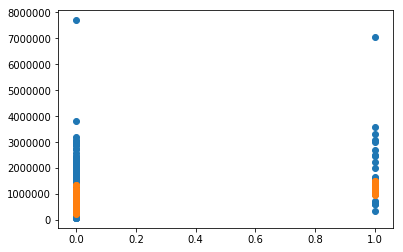

In [19]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

ridge = Ridge(normalize=True)

ridge.fit(x_train,y_train)

print('intercept :',ridge.intercept_)

print('coefficient :',ridge.coef_)

print('score :',ridge.score(x_test,y_test))

y_pred = ridge.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      

In [20]:
#Ridge Regression

#Predicting model - 3

intercept : -21990272.780493986
coefficient : [ 5.68070906e+01  4.89997754e+04  5.42085924e+01  5.40663674e+01
  3.74100316e+04  4.56915390e+04  5.56291746e+01  3.02462099e+03
  3.36525950e+05  3.60066618e+05  1.92314076e+04  3.28074437e+01
  7.00057084e-02 -3.26536215e-02 -8.33066969e+02  2.05467465e+04
 -9.79893584e+04 -6.95521597e-07 -4.81646556e+01]
score : 0.6383741148295177
predicted_value : [505735.80459876 505081.9012797  506527.24489842 ... 724984.85057365
 250811.88407705 506844.23250743]
MSE : 44925284859.931526
RMSE : 211955.8559227169
R2_score : 0.6383741148295177


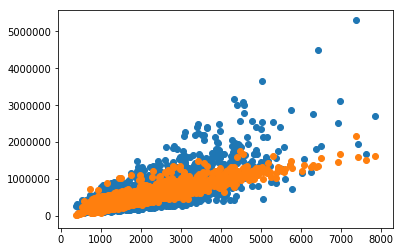

In [21]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

ridge = Ridge(normalize = True)

ridge.fit(x_train,y_train)

print('intercept :',ridge.intercept_)

print('coefficient :',ridge.coef_)

print('score :',ridge.score(x_test,y_test))

y_pred = ridge.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [22]:
#Polymnomial Regression

#Predciting model - 1

score : 0.8101029635406374
predicted_value : [ 506930.5493663  538310.5493663 1445590.5493663 ...  929046.5493663
  681932.5493663  294072.5493663]
MSE : 29602930443.760143
RMSE : 172055.02155926792
R2_score : 0.8101029635406374


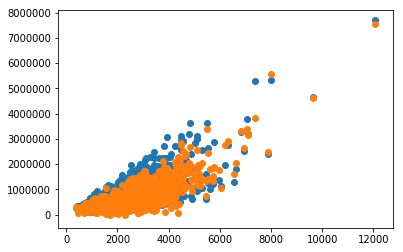

In [23]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x = df[features]

y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,shuffle = True)

poly = PolynomialFeatures(degree = 4) 

x_ = poly.fit_transform(x)

x_test_ = poly.fit_transform(x_test)

ln_reg = LinearRegression()

ln_reg.fit(x_,y)

#print('intercept :',ln_reg.intercept_)

#print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test_,y_test))

y_pred = ln_reg.predict(x_test_)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [24]:
#Polynomial Regression

#Prediction model - 2

score : 0.13924787477100253
predicted_value : [605847.2318553  561901.98371277 367990.3543248  ... 594971.52709775
 416109.80839718 595990.53372814]
MSE : 120711885076.7875
RMSE : 347436.15971396456
R2_score : 0.13924787477100253


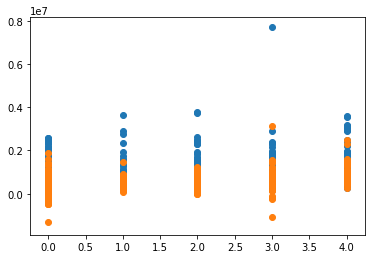

In [25]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x = df[features]

y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,shuffle = True)

poly = PolynomialFeatures(degree = 4) 

x_ = poly.fit_transform(x)

x_test_ = poly.fit_transform(x_test)

ln_reg = LinearRegression()

ln_reg.fit(x_,y)

#print('intercept :',ln_reg.intercept_)

#print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test_,y_test))

y_pred = ln_reg.predict(x_test_)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['view'] , y = y_test)

plt.scatter(x = x_test['view'] , y = y_pred)

plt.show()



In [26]:
#Polynomial Regression

#Predicting Model - 3

score : 0.7607128225548878
predicted_value : [[ 466317.25289707]
 [ 600979.60538703]
 [ 416782.97535372]
 ...
 [ 877646.9458754 ]
 [ 623242.93154822]
 [1562434.93673317]]
MSE : 34504664808.519966
RMSE : 185754.3130280424
R2_score : 0.7607128225548878


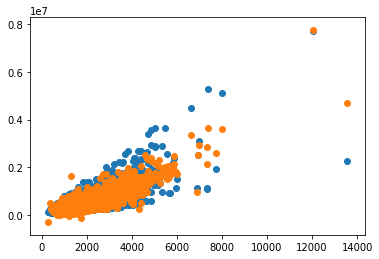

In [27]:
#selected all features to find maximum score_value(Accurarcy)

x = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']]


y = df[['price']]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,shuffle = True)

poly = PolynomialFeatures(degree = 2)

x_ = poly.fit_transform(x)

x_test_ = poly.fit_transform(x_test)

ln_reg = LinearRegression()

ln_reg.fit(x_,y)

#print('intercept :',ln_reg.intercept_)

#print('coefficient :',ln_reg.coef_)

print('score :',ln_reg.score(x_test_,y_test))

y_pred = ln_reg.predict(x_test_)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [28]:
#Decision tree Algorithm

#Predicting model - 1 

score : 0.5859967009047213
predicted_value : [ 750000.  270000.  535000. ... 1960000.  470000. 1245000.]
MSE: 50255828527.17449
RMSE : 224178.117859827
R2_score : 0.5859967009047213


<function matplotlib.pyplot.show(*args, **kw)>

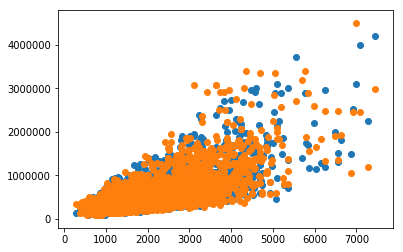

In [29]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

dt_reg = DecisionTreeRegressor()

dt_reg.fit(x_train,y_train)

#print('intercept :',dt_reg.intercept_)

#print('coefficient :',dt_reg.coef_)

print('score :',dt_reg.score(x_test,y_test))

y_pred = dt_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show



In [30]:
#Decision tree Regression

#Predicting Model - 2

score : 0.6294601497618314
predicted_value : [ 478000.  475000. 1300000. ...  435000.  277000. 1505000.]
MSE : 47017445153.46785
RMSE : 216835.0644002668
R2_score : 0.6294601497618314


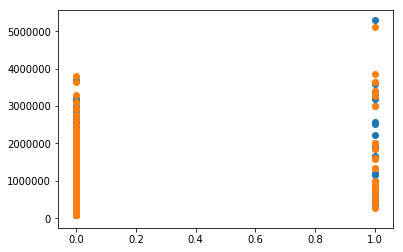

In [31]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

dt_reg = DecisionTreeRegressor()

dt_reg.fit(x_train,y_train)

#print('intercept :',lasso.intercept_)

#print('coefficient :',lasso.coef_)

print('score :',dt_reg.score(x_test,y_test))

y_pred = dt_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      

In [32]:
#Decision tree Algorithm

#Predicting Model - 3

score : 0.7627012742616882
predicted_value : [ 290000. 1680000.  695000. ...  600000.  325000.  290000.]
MSE : 27308197515.38885
RMSE : 165251.92136670862
R2_score : 0.7627012742616881


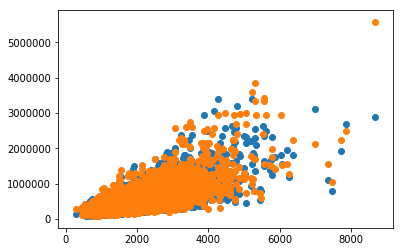

In [33]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

dt_reg = DecisionTreeRegressor()

dt_reg.fit(x_train,y_train)

#print('intercept :',dt_reg.intercept_)

#print('coefficient :',dt_reg.coef_)

print('score :',dt_reg.score(x_test,y_test))

y_pred = dt_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [34]:
#K Nearest Neighbour

#Predicting Model - 1

score : 0.40917974396506884
predicted_value : [[1163333.33333333]
 [ 249983.33333333]
 [ 378500.        ]
 ...
 [ 501283.33333333]
 [ 292583.33333333]
 [ 435000.        ]]
MSE: 79414728733.57388
RMSE : 281806.1900199743
R2_score : 0.40917974396506884


<function matplotlib.pyplot.show(*args, **kw)>

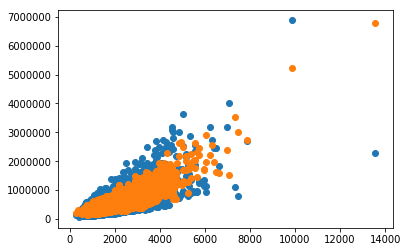

In [35]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

knn_reg = KNeighborsRegressor(n_neighbors=3) 

knn_reg.fit(x_train,y_train)

#print('intercept :',dt_reg.intercept_)

#print('coefficient :',dt_reg.coef_)

print('score :',knn_reg.score(x_test,y_test))

y_pred = knn_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show



In [36]:
#K Nearest Neighbour

#Predicting Model - 2

score : 0.37809108876631303
predicted_value : [263500.         393333.33333333 431666.66666667 ... 331500.
 225316.66666667 485333.33333333]
MSE : 86618060679.66412
RMSE : 294309.4641353963
R2_score : 0.37809108876631303


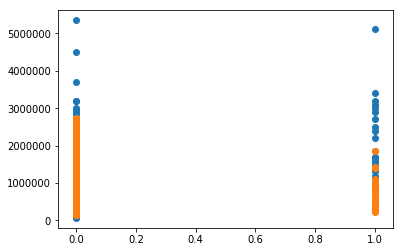

In [37]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

knn_reg = KNeighborsRegressor(n_neighbors=3)

knn_reg.fit(x_train,y_train)

#print('intercept :',lasso.intercept_)

#print('coefficient :',lasso.coef_)

print('score :',knn_reg.score(x_test,y_test))

y_pred = knn_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      

In [38]:
#K Nearest Neighbour

#Predicting Model - 3

score : 0.3693743874312093
predicted_value : [306225.         604333.33333333 279466.66666667 ... 512516.66666667
 909333.33333333 786333.33333333]
MSE : 89015993623.68213
RMSE : 298355.48197357147
R2_score : 0.3693743874312093


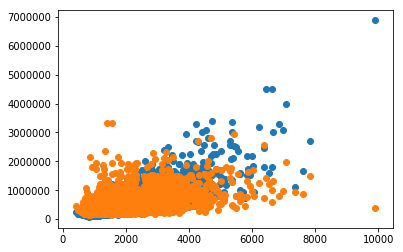

In [39]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

knn_reg = KNeighborsRegressor(n_neighbors=3)

knn_reg.fit(x_train,y_train)

#print('intercept :',poly.intercept_)

#print('coefficient :',poly.coef_)

print('score :',knn_reg.score(x_test,y_test))

y_pred = knn_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()

In [40]:
#Random Forest

#Predicting Model - 1

score : 0.4395006485218905
predicted_value : [[435000.        ]
 [434000.        ]
 [314333.33333333]
 ...
 [450166.66666667]
 [447666.66666667]
 [424333.33333333]]
MSE: 75908320736.23178
RMSE : 275514.64704482007
R2_score : 0.4395006485218905


<function matplotlib.pyplot.show(*args, **kw)>

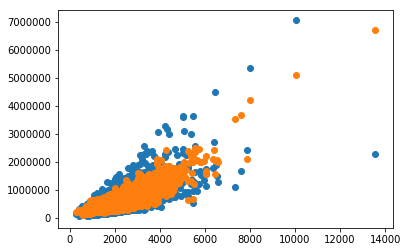

In [41]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)



knn_reg.fit(x_train,y_train)

#print('intercept :',dt_reg.intercept_)

#print('coefficient :',dt_reg.coef_)

print('score :',knn_reg.score(x_test,y_test))

y_pred = knn_reg.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print('MSE:',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show


In [42]:
#Random Forest Algorithm

#predicting model - 1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


score : 0.8102645545681287
predicted_value : [358380.583      217969.127      208458.55       ... 561069.45266667
 357653.07966667 194755.43      ]
25987428005.283955
RMSE : 161206.16615155872
R2_score : 0.8102645545681287


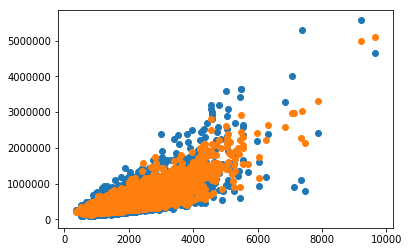

In [43]:
#selected features based on correlation of different data with prices for which corr value is above 30%

features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(x_train,y_train)

#print('intercept :',rf.intercept_)

#print('coefficient :',rf.coef_)

print('score :',rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test , y_pred)

print(MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'], y = y_pred)

plt.show()


In [44]:
#Random Forest ALgorithm

#Preddicting Model - 2

score : 0.7890039922614402
predicted_value : [449073.7535     676477.34       531463.5        ... 971369.79
 420310.67883333 554993.339     ]
MSE : 28871159685.30032
RMSE : 169915.1543721169
R2_score : 0.7890039922614402


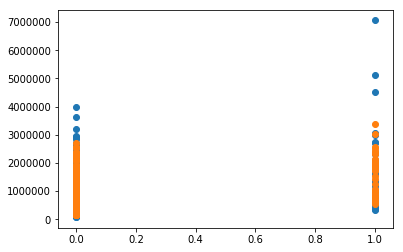

In [45]:
#selected features based on correlation of different data with prices for which corr value is below 30%

features = ['view', 'sqft_basement', 'bedrooms', 'lat','waterfront','floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built','condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(x_train,y_train)

#print('intercept :',rf.intercept_)

#print('coefficient :',rf.coef_)

print('score :',rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['waterfront'] , y = y_test)

plt.scatter(x = x_test['waterfront'] , y = y_pred)

plt.show()
      

In [46]:
#Random Forest Algorithm 

#Predicting Model - 3

score : 0.8829590282019839
predicted_value : [350571.178      430883.024      564321.065      ... 600391.506
 279917.18833333 502502.39466667]
MSE : 15297435662.84082
RMSE : 123682.80261556503
R2_score : 0.8829590282019839


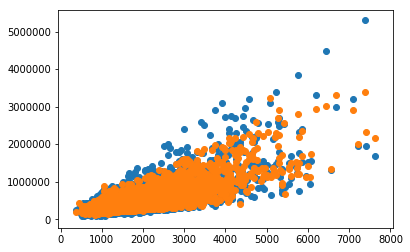

In [47]:
#selected all features to find maximum score_value(Accurarcy)

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(x_train,y_train)

#print('intercept :',rf.intercept_)

#print('coefficient :',rf.coef_)

print('score :',rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

print('predicted_value :',y_pred)

MSE = mse(y_test,y_pred)

print('MSE :',MSE)

print('RMSE :',sqrt(MSE))

print('R2_score :',r2_score(y_test,y_pred))

plt.scatter(x = x_test['sqft_living'] , y = y_test)

plt.scatter(x = x_test['sqft_living'] , y = y_pred)

plt.show()
      

In [48]:
#selected features based on correlation of different data with prices for which corr value is above 30%

df = {'Score(Accurarcy)':[0.614713,0.634076,0.58728,0.8054212,0.624900,0.3990286,0.800343],
      'MSE':[53723220510.556854,49585162257.67463,54630709938.33841,30667616090.1828,55638806133.4993,70882920360.99797,76295409639.09573],
     'RMSE':[231782.701059,2226777.260306,233732.132875089,175121.7179,235878.79542,266238.465216,276216.237102],
     'R2_Score':[0.6147138,0.607209,0.582401,0.8054212,0.525848,0.4477927,0.473591]}

tabular_columns = pd.DataFrame(df,index = ['Multi LinearRegression','LassoRegression','RidgeRegression','Polynomial Regression','DecisionTree','KNN','RandomForest'])

tabular_columns

,Score(Accurarcy),MSE,RMSE,R2_Score
Multi LinearRegression,0.614713,5.372322e+10,2.317827e+05,0.614714
LassoRegression,0.634076,4.958516e+10,2.226777e+06,0.607209
RidgeRegression,0.587280,5.463071e+10,2.337321e+05,0.582401
Polynomial Regression,0.805421,3.066762e+10,1.751217e+05,0.805421
DecisionTree,0.624900,5.563881e+10,2.358788e+05,0.525848
KNN,0.399029,7.088292e+10,2.662385e+05,0.447793
RandomForest,0.800343,7.629541e+10,2.762162e+05,0.473591


In [49]:
#selected features based on correlation of different data with prices for which corr value is below 30%

df = {'Score(Accurarcy)':[0.446240,0.442055,0.374787,0.1410729,0.549232,0.352832,0.757698],
     'MSE':[800884319674.01427,86932165591.86632,71054807845.94592,129386096436.02902,58754656722.18002,95460929334.0827,31026527332.387535],
     'RMSE':[282991.730752,294842.61156,266561.07713,242393.598704,359702.78903,308967.521487,176143.485069],
     'R2_Score':[0.446424,0.442055,0.374787,0.1410729,0.549232,0.352832,0.757698]}

tabular_columns = pd.DataFrame(df,index = ['Multi LinearRegression','LassoRegression','RidgeRegression','Polynomial Regression','DecisionTree','KNN','RandomForest'])

tabular_columns

,Score(Accurarcy),MSE,RMSE,R2_Score
Multi LinearRegression,0.446240,8.008843e+11,282991.730752,0.446424
LassoRegression,0.442055,8.693217e+10,294842.611560,0.442055
RidgeRegression,0.374787,7.105481e+10,266561.077130,0.374787
Polynomial Regression,0.141073,1.293861e+11,242393.598704,0.141073
DecisionTree,0.549232,5.875466e+10,359702.789030,0.549232
KNN,0.352832,9.546093e+10,308967.521487,0.352832
RandomForest,0.757698,3.102653e+10,176143.485069,0.757698


In [50]:
#selected all features to find maximum score_value(Accurarcy)

df = {'Score(Accruarcy)':[0.7047502,0.705713,0.622769,0.7335769,0.7164402,0.364693,0.877208],
     'MSE':[38485734905.8983,38877792132.0693,40791625772.69038,34001294191.5747,29561431904.85068,98519442596.76712,18166593711.779396],
     'RMSE':[196177.814509,197171.52201,235471.554557,184394.3984,193253.14349,313878.0693,134783.506824],
     'R2_Score':[0.704750,0.705713,0.622769,0.7335796,0.7164402,0.364649,0.877208]}
      
tabular_columns = pd.DataFrame(df,index = ['Multi LinearRegression','LassoRegression','RidgeRegression','Polynomial Regression','DecisionTree','KNN','RandomForest'])

tabular_columns

,Score(Accruarcy),MSE,RMSE,R2_Score
Multi LinearRegression,0.704750,3.848573e+10,196177.814509,0.704750
LassoRegression,0.705713,3.887779e+10,197171.522010,0.705713
RidgeRegression,0.622769,4.079163e+10,235471.554557,0.622769
Polynomial Regression,0.733577,3.400129e+10,184394.398400,0.733580
DecisionTree,0.716440,2.956143e+10,193253.143490,0.716440
KNN,0.364693,9.851944e+10,313878.069300,0.364649
RandomForest,0.877208,1.816659e+10,134783.506824,0.877208
